In [1]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##  Bernoulli Naive Bayes classifier

In [4]:
# importing the dataset
dataset = pd.read_csv('E:/Data Mining/DM Project/NaiveBayes.csv')

# split the data into inputs and outputs
X = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, 2].values


In [8]:
# training and testing data
from sklearn.model_selection import train_test_split

# assign test data size 25%
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size= 0.25, random_state=0)

In [9]:
# importing standard scaler
from sklearn.preprocessing import StandardScaler

# scalling the input data
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [11]:
# importing classifier
from sklearn.naive_bayes import BernoulliNB

# initializaing the NB
classifer = BernoulliNB()

# training the model
classifer.fit(X_train, y_train)

# testing the model
y_pred = classifer.predict(X_test)

In [12]:
# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(y_pred, y_test))

0.8


## Gaussian Naive Bayes Classifier

In [14]:
# import Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# create a Gaussian Classifier
classifer1 = GaussianNB()

# training the model
classifer1.fit(X_train, y_train)

# testing the model
y_pred1 = classifer1.predict(X_test)

In [15]:
# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(y_test,y_pred1))

0.91


## Evaluation of Bernoulli Naive Bayes classifier (confusion matrix)

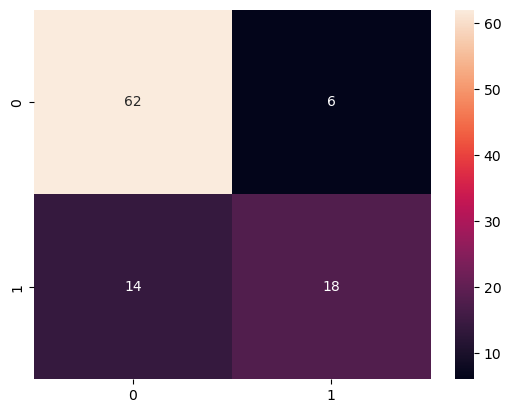

In [16]:
# importing the required modules
import seaborn as sns
from sklearn.metrics import confusion_matrix

# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)

# true write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
plt.savefig('Gaussian.png')

In [18]:
# importing classification report
from sklearn.metrics import classification_report

# printing the report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        68
           1       0.75      0.56      0.64        32

    accuracy                           0.80       100
   macro avg       0.78      0.74      0.75       100
weighted avg       0.79      0.80      0.79       100



## Evaluation of Gaussian Naive Bayes Classifier (confusion matrix)

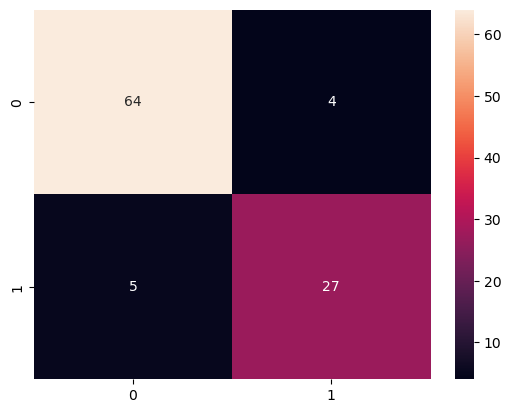

In [19]:
# importing the required modules
import seaborn as sns
from sklearn.metrics import confusion_matrix

# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred1)

# true write data values in each cell of the matrix
sns.heatmap(cm,annot=True)
plt.savefig('Gaussian.png')

In [20]:
# importing classification report
from sklearn.metrics import classification_report

# printing the report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        68
           1       0.87      0.84      0.86        32

    accuracy                           0.91       100
   macro avg       0.90      0.89      0.90       100
weighted avg       0.91      0.91      0.91       100



## Features Encoding

In [38]:
#هنا هيطبق الاجورزم التاني علي بيانات النصية
# assigning features and label variables
weather = ['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']

# output class
play = ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [39]:
# Import LabelEncoder
from sklearn import preprocessing

# creating LabelEncoder
labelCode = preprocessing.LabelEncoder()

# Converting string labels into numbers.
weather_encoded=labelCode.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [40]:
# import LabelEncoder
from sklearn import preprocessing

# creating LabelEncoder
labelCode = preprocessing.LabelEncoder()

# converting string labels into numbers.
label=labelCode.fit_transform(play)
print(label)

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [50]:
# importing numpy module
import numpy as np

# converting 1D array to 2D
weather_2d = np.reshape(weather_encoded, (-1, 1))
print(weather_2d)

[[2]
 [2]
 [0]
 [1]
 [1]
 [1]
 [0]
 [2]
 [2]
 [1]
 [2]
 [0]
 [0]
 [1]]


In [52]:
# import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# create a Gaussian Classifier
model = GaussianNB()

# train the model using the training sets
model.fit(weather_2d, label)

GaussianNB()

In [53]:
# predicting the odel
predicted= model.predict([[0]]) # 0:Overcast

# printing predicted value
print(predicted)

[1]


## Naive Bayes Classification with Multiple Labels

In [54]:
# import scikit-learn dataset library
from sklearn import datasets

# load dataset
dataset = datasets.load_wine()

In [55]:
# print the names of the 13 features
print ("Inputs: ", dataset.feature_names)

# print the label type of wine
print ("Outputs: ", dataset.target_names)

Inputs:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Outputs:  ['class_0' 'class_1' 'class_2']


In [56]:
print(dataset.data[0:3])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]]


In [57]:
print(dataset.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [58]:
# import train_test_split function
from sklearn.model_selection import train_test_split

# input and outputs
inputs = dataset.data
outputs = dataset.target

# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.3, random_state=1)


In [59]:
# import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# create a Gaussian Classifier
classifer = GaussianNB()

# train the model using the training sets
classifer.fit(X_train, y_train)

# predict the response for test dataset
y_pred = classifer.predict(X_test)

In [60]:
# import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# printing accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9814814814814815


## Evaluation of Naive Bayes Classifier for multi-classification


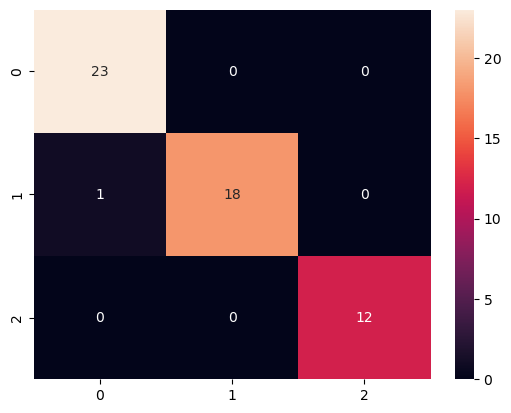

In [61]:
# importing the required modules
import seaborn as sns
from sklearn.metrics import confusion_matrix

# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)

# true Write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
plt.savefig('multi-classification.png')

In [62]:
# Importing classification report
from sklearn.metrics import classification_report

# printing the report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.95      0.97        19
           2       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

